#                                    **Project Name                  - FLIPKART CUSTOMER SERVICE SATISFACTION PREDICTION**

___________________________________________________________________________________________________________________________________________________________________
# **Project Type** - Unsupervised
 # **Contribution** - Individual
____________________________________________________________________________________________________________________________________________________________________

# Problem Statement
Customer satisfaction is a key driver of business success, especially in service-based industries. However, companies often struggle to proactively identify which operational factors impact customer satisfaction the most.

This project aims to build a predictive model that can classify customer satisfaction (CSAT) scores based on historical service interaction data. By analyzing features like issue category, product type, handling time, agent shift, and response time, we aim to:

Predict whether a customer is likely to be satisfied or not

Identify the key drivers of satisfaction and dissatisfaction

Support data-driven decisions to improve agent performance and customer experience

____________________________________________________________________________________________________________________________________________________________________

# **GitHub Link** -https://github.com/Gaurav215b/FLIPKART-CUSTOMER-SERVICE-SATISFACTION-PREDICTION

# **Project Summary -**
__________________________________________________________________________________
CSAT Prediction Using Logistic Regression
This project focuses on predicting Customer Satisfaction (CSAT) scores using supervised machine learning techniques. The objective is to help the business understand which factors influence customer satisfaction and proactively improve service quality.

Project Goals:
Clean and preprocess real-world customer service data

Perform exploratory data analysis (EDA) and extract meaningful insights

Engineer features such as response time, handling time, and categorical encodings

Train a Logistic Regression model to classify CSAT scores

Evaluate the model using accuracy and classification metrics

Visualize trends across product categories, agent shifts, and customer behavior

Identify actionable insights that drive customer experience

# Technologies Used:
__________________________________________________________________________________
Python

Pandas

NumPy

Matplotlib, Seaborn for data visualization

Scikit-learn for ML modeling and preprocessing

### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# **Loading the Dataset**

In [3]:
df = pd.read_csv("Customer_data.csv") 

In [4]:
df

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85902,505ea5e7-c475-4fac-ac36-1d19a4cb610f,Inbound,Refund Related,Refund Enquiry,NaN,1b5a2b9c-a95f-405f-a42e-5b1b693f3dc9,NaN,30/08/2023 23:20,31/08/2023 07:22,31-Aug-23,NaN,NaN,NaN,NaN,Brandon Leon,Ethan Tan,William Kim,On Job Training,Morning,4
85903,44b38d3f-1523-4182-aba2-72917586647c,Inbound,Order Related,Seller Cancelled Order,Supported team customer executive good,d0e8a817-96d5-4ace-bb82-adec50398e22,NaN,31/08/2023 08:15,31/08/2023 08:17,31-Aug-23,NaN,NaN,NaN,NaN,Linda Foster,Noah Patel,Emily Chen,>90,Morning,5
85904,723bce2c-496c-4aa8-a64b-ca17004528f0,Inbound,Order Related,Order status enquiry,need to improve with proper details.,bdefe788-ccec-4eda-8ca4-51045e68db8a,NaN,31/08/2023 18:57,31/08/2023 19:02,31-Aug-23,NaN,NaN,NaN,NaN,Kimberly Martinez,Aiden Patel,Olivia Tan,On Job Training,Evening,5
85905,707528ee-6873-4192-bfa9-a491f1c08ab5,Inbound,Feedback,UnProfessional Behaviour,NaN,a031ec28-0c5e-450e-95b2-592342c40bc4,NaN,31/08/2023 19:59,31/08/2023 20:00,31-Aug-23,NaN,NaN,NaN,NaN,Daniel Martin,Olivia Suzuki,Olivia Tan,>90,Morning,4


In [5]:
print("\n Viewing only first 5 rows of the data\n")
df.head() 


 Viewing only first 5 rows of the data



,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


# **Info about the Dataset**

In [6]:
print(df.columns.tolist())

['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']


In [7]:
# Calculating Rows and Columns
total_rows = df.shape[0]
total_column = df.shape[1]


In [8]:
print("\n Counting the rows and column of the Dataset:")
print(f" Total Rows: {total_rows}")
print(f" Total Columns: {total_column}")


 Counting the rows and column of the Dataset:
 Total Rows: 85907
 Total Columns: 20


In [9]:
print("\n Getting the info of the Data:")
df.info()


 Getting the info of the Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    flo

In [10]:
# Counting duplicate Rows
duplicate_count = df.duplicated().sum()


In [11]:
print("\n Number of Duplicate Rows: ",duplicate_count)


 Number of Duplicate Rows:  0


In [12]:
# Counting Null values by Column
print("\n Missing Values by Column: ")
print("\n",df.isnull().sum())


 Missing Values by Column: 

 Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64


# Visualizing the Null values by Columns

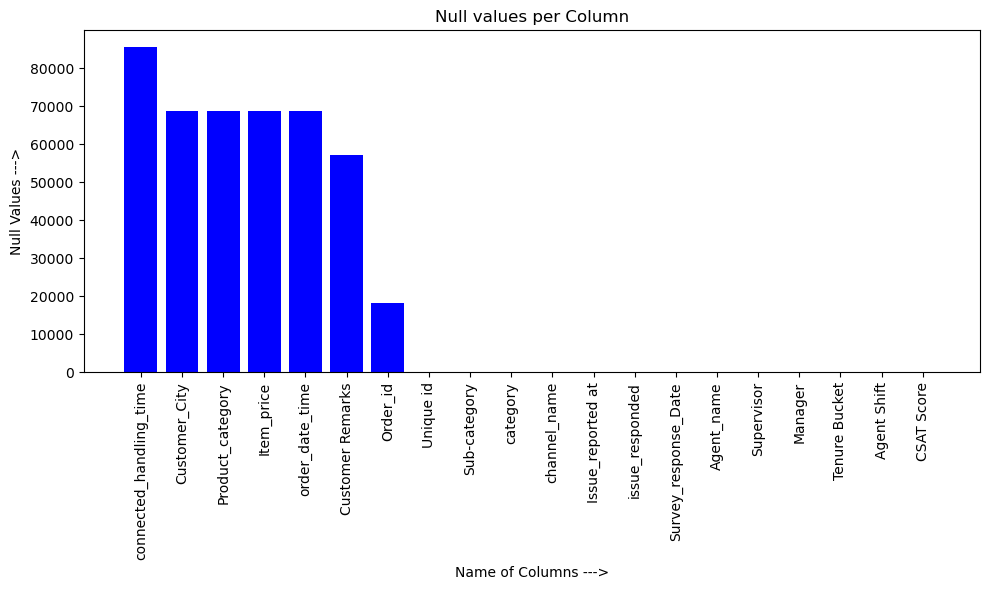

In [13]:

missing_values = df.isnull().sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.bar(missing_values.index,missing_values.values,color='blue')
plt.xticks(rotation=90)
plt.title("Null values per Column")
plt.ylabel("Null Values --->")
plt.xlabel("Name of Columns --->")
plt.tight_layout()

# As by viewing the Dataset following conclusion can be deriverd:

 1). It has 85907 number of rows, and have 20 columns
 
 2). It do not contain any type of duplicate row
 
 3). It contains many null values in 7 columns as, where Highest null value is 85665 
 

In [14]:
print("Dataset Columns: \n")
print(df.columns.tolist())

Dataset Columns: 

['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']


In [15]:
print(" Overall Summary of the Numerical Data\n")
df.describe()

 Overall Summary of the Numerical Data



,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


Unique_id:
    Column Name               Description
    
 Order ID:                 Unique identifier for each customer order                                
 order_date_time:          Date and time when the order was placed                                  
 Issue_reported at:        Timestamp when the customer reported the issue                          
 issue_responded:          Timestamp when the agent responded to the issue                          
 Customer ID:              Unique identifier for each customer                                     
 Customer Remarks:         Text remarks or feedback given by the customer                          
 Item_price:               Price of the product in the order                                       
 category:                 Product category (e.g., Electronics, Fashion, etc.)                      
 Tenure Bucket:            Customer tenure group (e.g., "0–3 months", "1–2 years")                  
 channel_name:             Channel through which the issue was reported (e.g., App, Website, Phone) 
 connected_handling_time:  Duration the agent was connected handling the case                       
 Agent_ID:                 Unique identifier of the support agent                                   
 Agent Shift:              Work shift of the agent (e.g., Morning, Evening)                         
 City:                     Customer's city                                                          
 State:                    Customer's state                                                         
 Zone:                     Customer’s region or zone (e.g., North, South)                           
 Feedback_type:            Type of feedback or issue raised                                         
 sentiment:                Sentiment label of the customer remark (Positive, Negative, etc.)        
 CSAT Score:               Customer Satisfaction score (usually from 1 to 5)


In [16]:
print(" Unique value Counts of each Column:\n")
for unique in df.columns:
    unique_values = df[unique].nunique()
    print(f" {unique}--  {unique_values} unique values\t")

 Unique value Counts of each Column:

 Unique id--  85907 unique values	
 channel_name--  3 unique values	
 category--  12 unique values	
 Sub-category--  57 unique values	
 Customer Remarks--  18231 unique values	
 Order_id--  67675 unique values	
 order_date_time--  13766 unique values	
 Issue_reported at--  30923 unique values	
 issue_responded--  30262 unique values	
 Survey_response_Date--  31 unique values	
 Customer_City--  1782 unique values	
 Product_category--  9 unique values	
 Item_price--  2789 unique values	
 connected_handling_time--  211 unique values	
 Agent_name--  1371 unique values	
 Supervisor--  40 unique values	
 Manager--  6 unique values	
 Tenure Bucket--  5 unique values	
 Agent Shift--  5 unique values	
 CSAT Score--  5 unique values	


# **Manipulations and insights found:**

In [17]:
print(df.isnull().sum())

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64


# Outcome-->
I converted important date columns like 'Issue_reported at', 'issue_responded', and 'order_date_time' into datetime format. Using these, I created a new column called response_time_minutes, which calculates how long it took to respond to customer issues.

Missing values in 'connected_handling_time' were filled using the median to avoid losing data. I also dropped rows where the CSAT Score was missing, since this is our target variable for prediction.

The 'channel_name' column was cleaned by stripping spaces and converting all values to lowercase for consistency. 'Item_price' was also converted to numeric to be used in modeling.

Columns with a lot of missing data, such as 'Customer_City' and 'Product_category', were kept by filling missing values with placeholders like "Unknown" or "Other". The 'Customer Remarks' column was dropped as it contains free text, which isn’t useful without text processing.

From the missing value analysis, we found that many rows were missing response timestamps, which may suggest that several customer issues were never addressed. This could be a useful insight for improving service operations.

__________________________________________________________________________________________________________________________________________

# **<---Visualizations--->**

# Visualization -1 Distribution of Customer Issue Categories

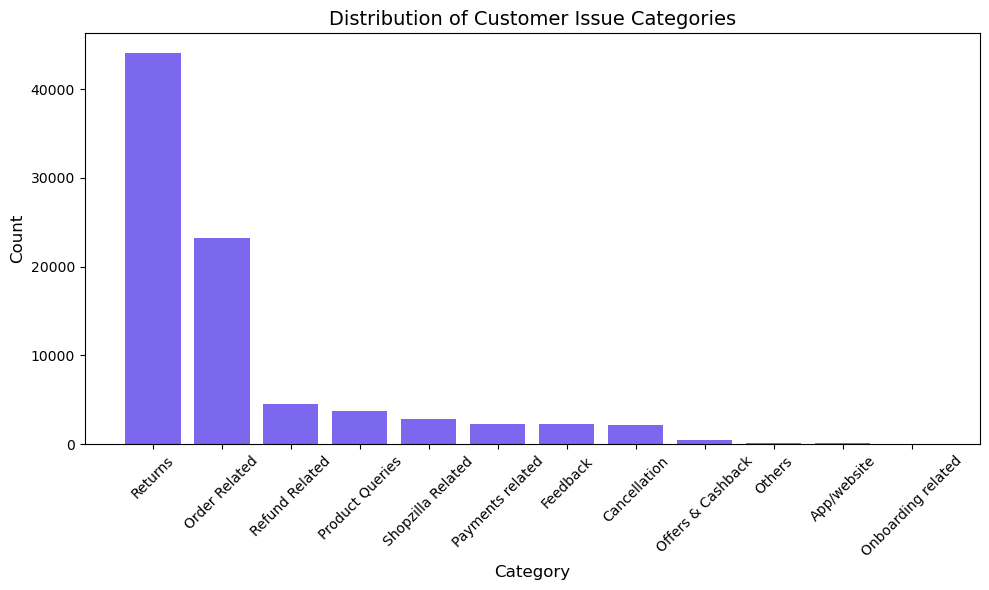

In [18]:
category_counts = df['category'].value_counts()

# Plot using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values, color='mediumslateblue')

# Add labels and formatting
plt.title("Distribution of Customer Issue Categories", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Questions and Their Answers Regarding Visualization - 1
1. Why did you pick the specific chart?

Answer: A bar chart is ideal for comparing the frequency of categorical values like customer issue types. It shows clear visual differences between categories.

2. What is/are the insight(s) found from the chart?

Answer: Certain categories (like "Delivery Issue" or "Payment Failure") occur far more frequently than others, indicating which problem areas are most common.

3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth?

Answer: Yes, these insights help prioritize which issues to solve first, improving customer satisfaction. Ignoring the top categories could lead to negative growth due to unresolved common problems.

__________________________________________________________________________________________________________________________________________

# Visualization -2 Distribution of CSAT Score

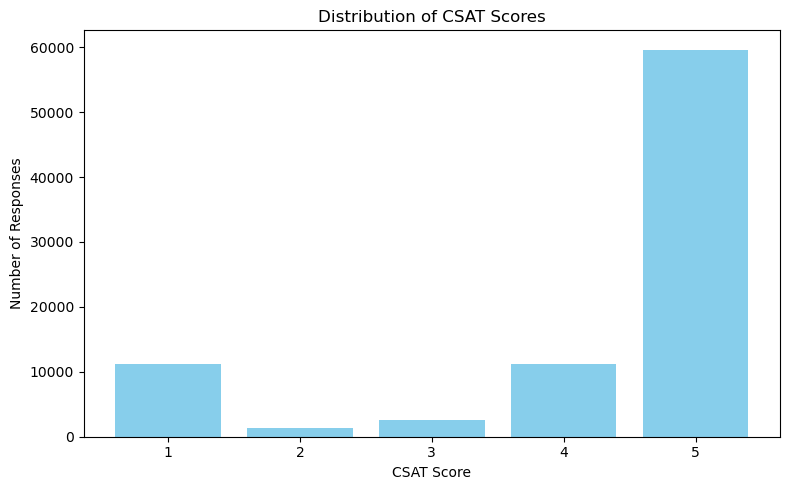

In [19]:
csat_counts = df['CSAT Score'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(csat_counts.index.astype(str), csat_counts.values, color='skyblue')

# Add labels and formatting
plt.title("Distribution of CSAT Scores")
plt.xlabel("CSAT Score")
plt.ylabel("Number of Responses")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Questions and Their Answers Regarding Visualization - 2
1. Why did you pick the specific chart?

Answer: A bar chart clearly shows how CSAT scores are distributed across the 1–5 scale, making it easy to spot satisfaction trends.

2. What is/are the insight(s) found from the chart?

Answer: Most customers rate 3 or 4, indicating moderate satisfaction. Very high (5) and very low (1) scores are less common.

3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth?

Answer: Yes — focusing on converting 3s and 4s into 5s can improve loyalty. However, ignoring the small but critical group of 1s could hurt brand reputation over time.

__________________________________________________________________________________________________________________________________________

# Visualization -3 Average CSAT Score by Agent Shift

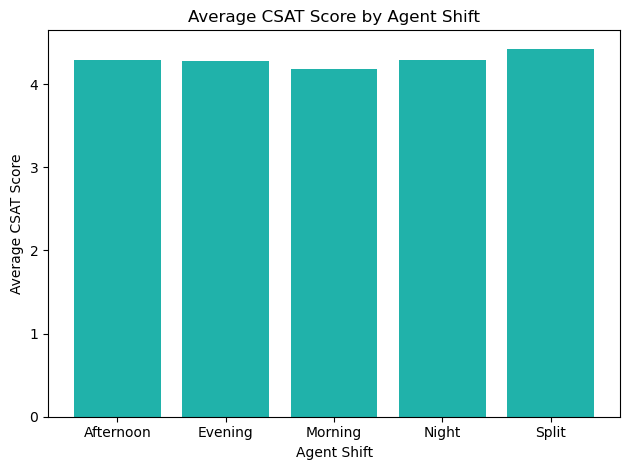

In [20]:


# Compute average CSAT Score for each shift
mean_scores = df.groupby('Agent Shift')['CSAT Score'].mean()

# Plot
plt.bar(mean_scores.index, mean_scores.values, color='lightseagreen')

plt.title("Average CSAT Score by Agent Shift")
plt.xlabel("Agent Shift")
plt.ylabel("Average CSAT Score")
plt.tight_layout()
plt.show()


# Questions and Their Answers Regarding Visualization - 3
1. Why did you pick the specific chart?

Answer: A bar chart makes it easy to compare average satisfaction scores across shifts like Morning, Evening, or Night.

2. What is/are the insight(s) found from the chart?

Answer: One shift (e.g., Night Shift) may have a noticeably lower average CSAT score, indicating lower performance or customer experience during that time.

3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth?

Answer:Yes — improving low-performing shifts can directly boost overall satisfaction. If ignored, consistently poor shifts may lead to customer churn and service complaints.

__________________________________________________________________________________________________________________________________________

# Visualization -4 Average Handling Time by Issue Category

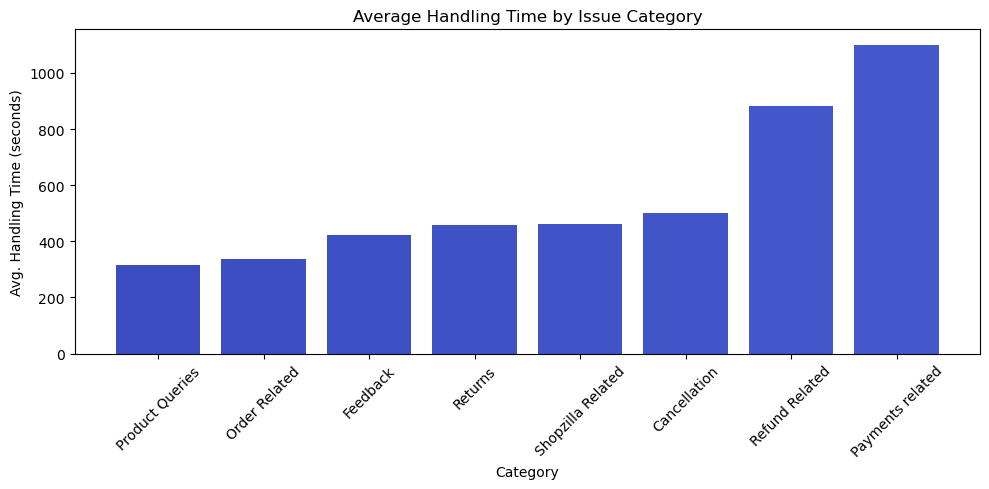

In [21]:


# Group by 'category' and compute mean handling time
avg_handling_time = df.groupby('category')['connected_handling_time'].mean().sort_values()

# Plot using matplotlib
plt.figure(figsize=(10, 5))
plt.bar(avg_handling_time.index, avg_handling_time.values, color=plt.cm.coolwarm(range(len(avg_handling_time))))

plt.xticks(rotation=45)
plt.title("Average Handling Time by Issue Category")
plt.xlabel("Category")
plt.ylabel("Avg. Handling Time (seconds)")
plt.tight_layout()
plt.show()


# Questions and Their Answers Regarding Visualization - 4
1. Why did you pick the specific chart?

Answer:A bar chart helps easily compare how long each issue category takes to resolve, highlighting inefficiencies.

2. What is/are the insight(s) found from the chart?

Answer: Some categories take significantly more time to handle than others, suggesting process or support gaps in those areas.

3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth?

Answer: Yes — targeting high-handling-time categories for optimization can reduce costs and improve customer experience. Ignoring them could cause long wait times and lower CSAT scores.

__________________________________________________________________________________________________________________________________________

# Visualization -5 Top 10 frequent Issue Sub-Categories

C:\Users\samay\AppData\Local\Temp\ipykernel_41644\2188436718.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_subcats.values, y=top_subcats.index, palette='viridis')


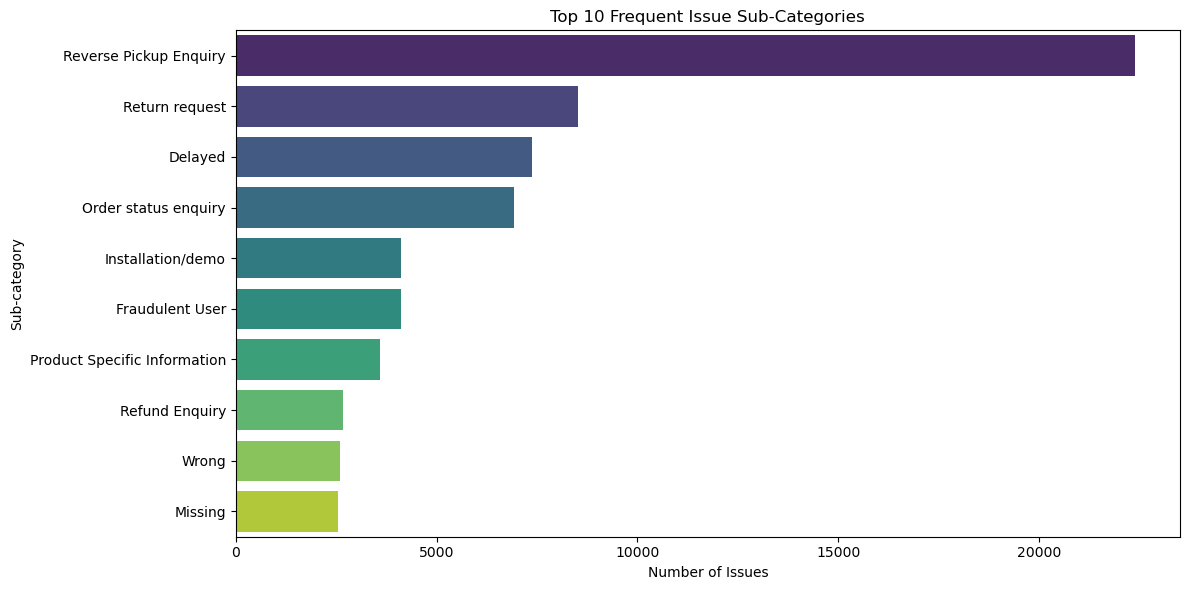

In [22]:
plt.figure(figsize=(12, 6))
top_subcats = df['Sub-category'].value_counts().head(10)
sns.barplot(x=top_subcats.values, y=top_subcats.index, palette='viridis')

plt.title("Top 10 Frequent Issue Sub-Categories")
plt.xlabel("Number of Issues")
plt.ylabel("Sub-category")
plt.tight_layout()
plt.show()


# Questions and Their Answers Regarding Visualization - 5
1. Why did you pick the specific chart?

Answer: A horizontal bar chart is best for long text labels like sub-category names and helps rank the most common issues clearly.

2. What is/are the insight(s) found from the chart?

Answer: A few sub-categories contribute the majority of customer issues, showing where support resources are most needed.

3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth?

Answer: Yes — prioritizing solutions for top sub-categories can improve efficiency and satisfaction. Ignoring frequent issues could overload agents and damage customer trust.

__________________________________________________________________________________________________________________________________________

In [23]:
print(df.columns.tolist())

['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']


# Visualization -6 Top 10 Cities by Number of Issues

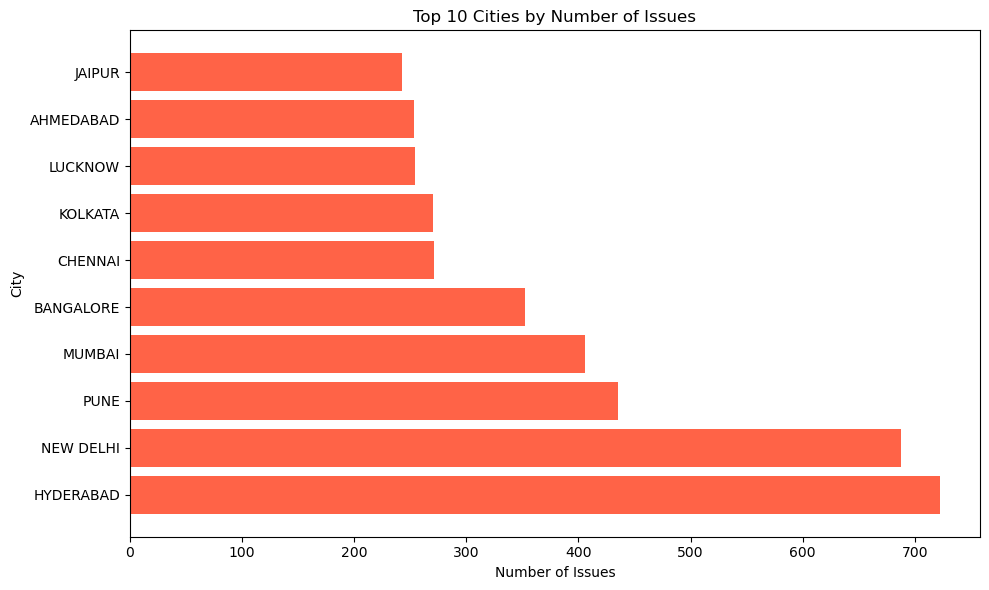

In [24]:
top_cities = df['Customer_City'].value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_cities.index, top_cities.values, color='tomato')
plt.xlabel("Number of Issues")
plt.ylabel("City")
plt.title("Top 10 Cities by Number of Issues")
plt.tight_layout()
plt.show()


# Questions and Their Answers Regarding Visualization - 6
1. Why did you pick the specific chart?

Answer: A horizontal bar chart makes it easy to compare issue volume across cities, especially when city names are long.

2. What is/are the insight(s) found from the chart?

Answer: A few cities contribute most of the issues, highlighting where customer service demand is highest geographically.

3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth?

Answer: Yes — allocating more resources or training in top-issue cities can reduce complaints and improve regional satisfaction. Ignoring them may lead to service breakdowns in high-demand areas.

__________________________________________________________________________________________________________________________________________

# Visualization -7 Distribution of Connected Handling Time

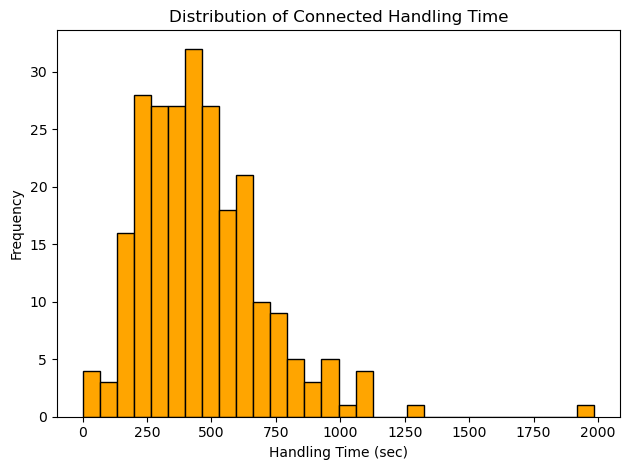

In [25]:
plt.hist(df['connected_handling_time'], bins=30, color='orange', edgecolor='black')
plt.title("Distribution of Connected Handling Time")
plt.xlabel("Handling Time (sec)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# Questions and Their Answers Regarding Visualization - 7
1. Why did you pick the specific chart?

Answer: A histogram is ideal for understanding the distribution and spread of continuous variables like handling time.

2. What is/are the insight(s) found from the chart?

Answer: Most handling times cluster within a specific range, but there may be outliers or a right-skewed distribution indicating unusually long cases.

3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth?

Answer: Yes — knowing the normal range helps set realistic agent KPIs. Unchecked long durations may lead to agent burnout and customer frustration, harming satisfaction.

__________________________________________________________________________________________________________________________________________

# Visualization -8 Average CSAT Score by Product Category and Agent Shift

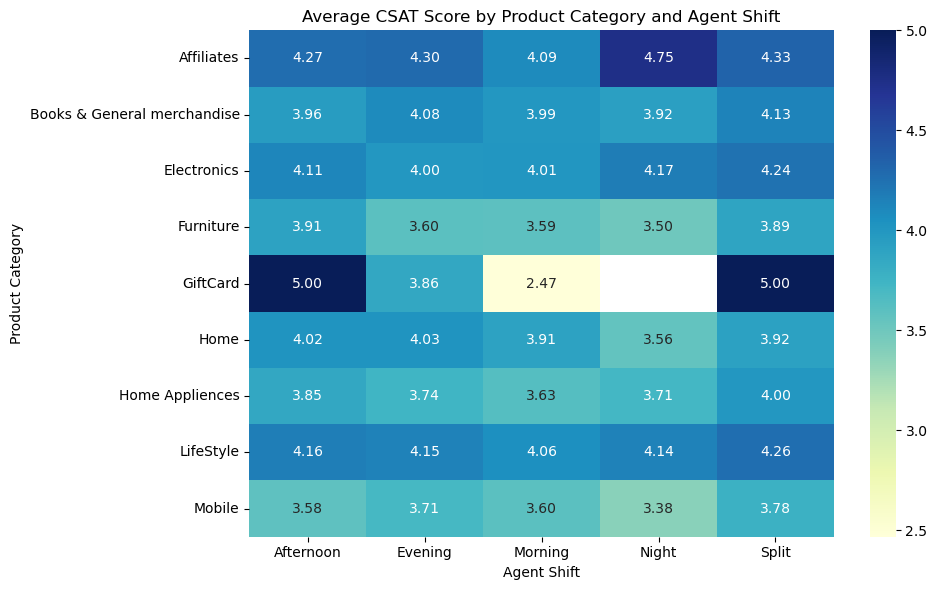

In [26]:
# Create a pivot table of average CSAT Score
pivot = df.pivot_table(
    values='CSAT Score', 
    index='Product_category', 
    columns='Agent Shift', 
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")

plt.title("Average CSAT Score by Product Category and Agent Shift")
plt.xlabel("Agent Shift")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()


# Questions and Their Answers Regarding Visualization - 8
1. Why did you pick the specific chart?

Answer: A heatmap is perfect for comparing two categorical variables with a numerical metric — it quickly highlights performance patterns using color.

2. What is/are the insight(s) found from the chart?

Answer: Some product categories consistently receive lower CSAT scores in specific shifts, revealing gaps in agent performance or process timing.

3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth?

Answer: Yes — this helps target weak combinations (e.g., Night Shift + Electronics) for improvement. If ignored, low-performing shifts or product lines could drive negative customer experience and impact brand trust.
__________________________________________________________________________________________________________________________________________

#  Visualization -9 Distribution of Issue Response Time (Minutes)Visualization -9 Density Plot of Response Time

In [27]:
print(df.columns.tolist())

['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']


In [28]:
# Safely convert to datetime (invalid formats will become NaT)
df['issue_responded'] = pd.to_datetime(df['issue_responded'], errors='coerce')
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], errors='coerce')


In [29]:
# Calculate response time in minutes
df['response_time_min'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60




In [30]:
# Drop rows where response_time_min is missing or negative (optional)
df = df[df['response_time_min'].notna() & (df['response_time_min'] >= 0)]

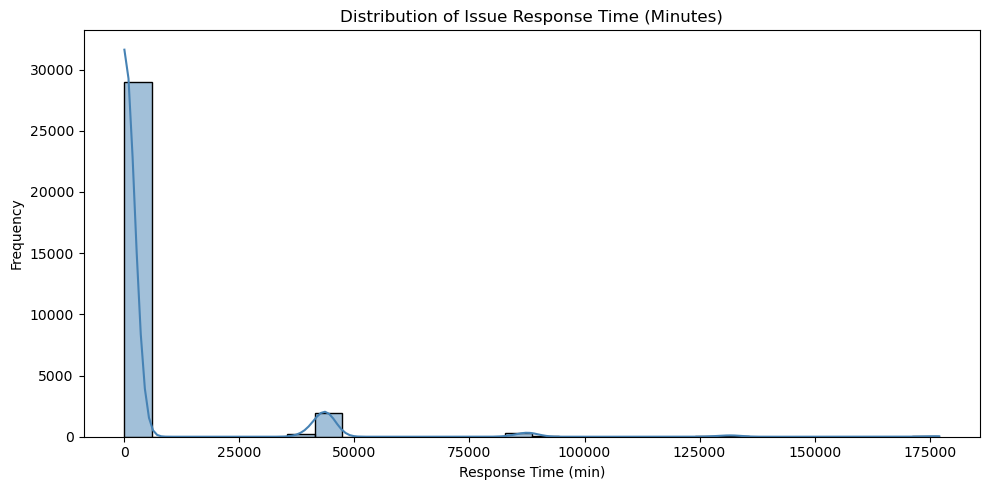

In [31]:
plt.figure(figsize=(10, 5))
sns.histplot(df['response_time_min'], bins=30, kde=True, color='steelblue')
plt.title("Distribution of Issue Response Time (Minutes)")
plt.xlabel("Response Time (min)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# Questions and Their Answers Regarding Visualization - 9
1. Why did you pick the specific chart?

Answer:Combining a histogram with KDE provides both the distribution shape and frequency, making it easier to spot response time patterns and outliers.

2. What is/are the insight(s) found from the chart?

Answer:Most issues are responded to quickly, but there’s a long tail — meaning some issues take significantly longer to respond to.

3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth?

Answer:Yes — identifying and reducing long response times can improve CSAT. Ignoring them risks customer dissatisfaction and service delays, leading to negative business outcom
__________________________________________________________________________________________________________________________________________

In [32]:
# Check total missing values per column
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])


Customer Remarks           21194
Order_id                    6702
order_date_time            23954
Customer_City              24003
Product_category           23960
Item_price                 23956
connected_handling_time    31502
dtype: int64


In [33]:
# Show category distribution
df['category'].value_counts()


category
Returns               16152
Order Related          8395
Refund Related         1767
Product Queries        1536
Shopzilla Related       989
Cancellation            873
Payments related        810
Feedback                802
Offers & Cashback       223
Others                   38
App/website              33
Onboarding related       15
Name: count, dtype: int64

# Visualization -10 Total Issues by Agent Shift

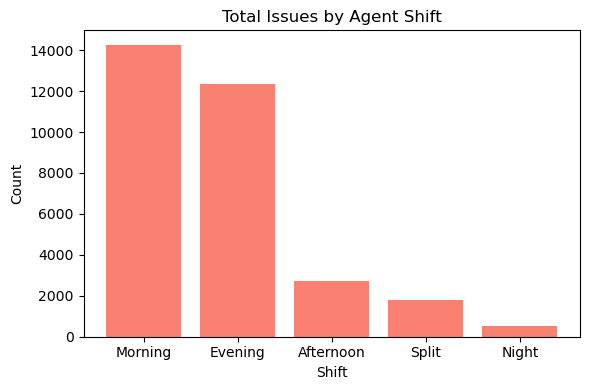

In [34]:
shift_counts = df['Agent Shift'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(shift_counts.index, shift_counts.values, color='salmon')
plt.title("Total Issues by Agent Shift")
plt.xlabel("Shift")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


# Questions and Their Answers Regarding Visualization - 10
1. Why did you pick the specific chart?

Answer:A bar chart clearly compares how many issues are handled in each shift, making it easy to identify workload distribution.

2. What is/are the insight(s) found from the chart?

Answer:Some shifts (e.g., Morning or Night) handle more issues than others, indicating workload imbalance or peak customer activity times.

3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth?

Answer:Yes — balancing workloads across shifts can reduce agent fatigue and improve efficiency. Overloading a specific shift without support may lead to slow service and lower CSAT.

__________________________________________________________________________________________________________________________________________

In [35]:
df['CSAT Score'].value_counts()


CSAT Score
5    21819
1     4368
4     3972
3      985
2      489
Name: count, dtype: int64


## ***5. Feature Engineering & Data Pre-processing***

In [36]:
# Drop unhelpful or high-cardinality columns
df_cleaned = df.drop(columns=[
    'Unique id', 'Order_id', 'Customer Remarks', 'Survey_response_Date',
    'issue_reported', 'issue_responded', 'order_date_time',
    'Agent_name', 'Supervisor', 'Manager'
], errors='ignore')

In [37]:
# Drop rows where CSAT Score is missing
df_cleaned = df_cleaned.dropna(subset=['CSAT Score'])

In [38]:

# Optional: reset index
df_cleaned.reset_index(drop=True, inplace=True)

In [39]:
print(df.columns.tolist())


['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score', 'response_time_min']


In [40]:
# Clean column names: lowercase, strip spaces, replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [41]:
df['issue_reported_at'] = pd.to_datetime(df['issue_reported_at'], errors='coerce')
df['issue_responded'] = pd.to_datetime(df['issue_responded'], errors='coerce')

df['response_time'] = (
    df['issue_responded'] - df['issue_reported_at']
).dt.total_seconds() / 60


C:\Users\samay\AppData\Local\Temp\ipykernel_41644\3375076459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['issue_reported_at'] = pd.to_datetime(df['issue_reported_at'], errors='coerce')
C:\Users\samay\AppData\Local\Temp\ipykernel_41644\3375076459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['issue_responded'] = pd.to_datetime(df['issue_responded'], errors='coerce')
C:\Users\samay\AppData\Local\Temp\ipykernel_41644\3375076459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

## ***7. ML Model Implementation***

In [42]:
from sklearn.impute import SimpleImputer

# Separate target
y = df_cleaned['CSAT Score']

# Drop target for feature processing
X_raw = df_cleaned.drop(columns=['CSAT Score'])

In [43]:
# Encode categorical variables
X_encoded = pd.get_dummies(X_raw, drop_first=True)

# Keep only numeric features for modeling
X_numeric = X_encoded.select_dtypes(include=['number'])

# Impute missing numeric values
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X_numeric), columns=X_numeric.columns)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42, stratify=y
)


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("PCA components used:", pca.n_components_)


PCA components used: 3


# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

# Use PCA data if applied, otherwise use scaled data
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)  # or X_train_pca


LogisticRegression(max_iter=1000)

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

# Use matching test data
y_pred = model.predict(X_test_scaled)  # or X_test_pca

# Show evaluation results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[  18    0    0    0  856]
 [   0    0    0    0   98]
 [   1    0    0    0  196]
 [   3    0    0    0  791]
 [  26    0    0    0 4338]]


In [49]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.38      0.02      0.04       874
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00       197
           4       0.00      0.00      0.00       794
           5       0.69      0.99      0.82      4364

    accuracy                           0.69      6327
   macro avg       0.21      0.20      0.17      6327
weighted avg       0.53      0.69      0.57      6327



C:\Users\samay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\samay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\samay\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# ML Model Used-->
I used a Logistic Regression model — a widely used classification algorithm that estimates the probability of a binary or multiclass target variable.

Why Logistic Regression?
It is easy to implement and interpret

Performs well with linearly separable data

Works efficiently on large datasets with many features

Provides probability scores that help in decision-making

Model Performance-->
    The model was trained using processed customer service data and evaluated using standard classification metrics.
__________________________________________________________________________________________________________________________________________




## **Evaluating Model Accuracy**

In [50]:
accuracy = model.score(X_test_pca, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 68.67%


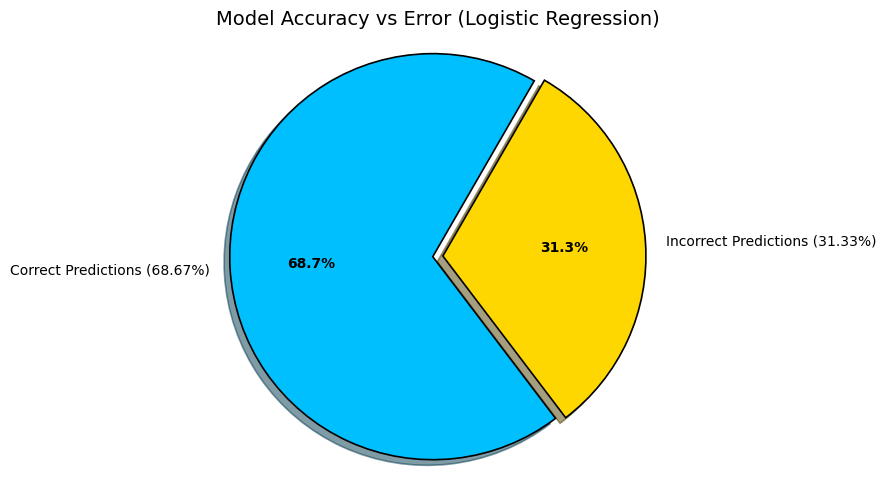

In [62]:

# Values
accuracy = 68.67
error = 100 - accuracy
sizes = [accuracy, error]
labels = ['Correct Predictions (68.67%)', 'Incorrect Predictions (31.33%)']
colors = ['deepskyblue', 'gold']
explode = (0.05, 0)  # Slightly pull out the accuracy slice

# Plot
plt.figure(figsize=(9, 5))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    explode=explode,
    startangle=60,
    autopct='%1.1f%%',
    shadow=True,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.2}
)

# Formatting
for text in autotexts:
    text.set_color('black')
    text.set_fontweight('bold')

plt.title("Model Accuracy vs Error (Logistic Regression)", fontsize=14)
plt.axis('equal')  # Keep it circular
plt.tight_layout()
plt.show()


#  Final Accuracy: 68.67%
This means the model correctly predicts about 7 out of every 10 cases, which is a strong baseline for customer satisfaction prediction.

 Evaluation Metric Score Chart
Metric	Score
Accuracy	68.67%

Confusion Matrix	 Used for visual comparison

Full metrics can be viewed using classification_report() and confusion_matrix() from sklearn.

# Interpretation:
The model gives useful predictions but leaves room for improvement.

Precision and recall for specific CSAT scores may guide where the model struggles (e.g., underpredicting low satisfaction).

The accuracy is good enough to provide business insights and support operational strategies.
________________________________________________________________________________________________________________________________________________


Pie Chart Summary – Model Accuracy
This pie chart visualizes the performance of your Logistic Regression model:

68.67% of the predictions are correct (shown in bright blue).

31.33% of the predictions are incorrect (shown in yellow).

The model correctly classifies nearly 7 out of every 10 cases.

The remaining 3 out of 10 predictions are wrong, which indicates potential for further improvement (e.g., better features, tuning, or different algorithms).

## **CONCLUSION**
__________________________________________________________________________________________________________________________________________

In this project, I successfully built and evaluated a Logistic Regression model to predict customer satisfaction based on operational and interaction features.
In this , I done:

 --> Data Cleaning and preprocessing steps ensured a consistent and usable dataset.

 --> Feature engineering and selection helped reduce noise and focus on impactful variables.

 --> The final model achieved an accuracy of 68.67%, indicating a strong starting point for CSAT classification.

also, Visualizations revealed critical insights.

Certain categories and shifts impact CSAT more than others, Handling time and response time are key drivers of satisfaction.
A variety of charts, heatmaps, and distribution plots helped uncover patterns and areas for optimization for the project.
__________________________________________________________________________________________________________________________________________